In [1]:
"""
https://www.guru99.com/rnn-tutorial.html
"""
import numpy as np
import tensorflow as tf
n_inputs = 4
n_neurons = 6
n_timesteps = 2
## The data is a sequence of a number from 0 to 9 and divided into three batches of data.
## Data 
X_batch = np.array([
        [[0, 1, 2, 5], [9, 8, 7, 4]], # Batch 1
        [[3, 4, 5, 2], [0, 0, 0, 0]], # Batch 2
        [[6, 7, 8, 5], [6, 5, 4, 2]], # Batch 3
    ])

In [28]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_timesteps, n_inputs])

In [32]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [33]:
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [34]:
## Define the network
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})
    states_eval = states.eval(feed_dict={X: X_batch})
    print(states_eval)

[[ 0.9999892  -0.99997103  0.34582123  0.9999905  -0.99999994  0.92930496]
 [-0.6357938  -0.44919583  0.88279986 -0.8375365  -0.45702013 -0.15238999]
 [ 0.99539393 -0.9986669   0.7023478   0.99714154 -0.9999748   0.5874308 ]]


In [27]:
print(states_eval.shape)
print(outputs_val.shape)

(3, 6)
(3, 2, 6)


In [36]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
def create_ts(start = '2001', n = 201, freq = 'M'):
    rng = pd.date_range(start=start, periods=n, freq=freq)
    ts = pd.Series(np.random.uniform(-18, 18, size=len(rng)), rng).cumsum()
    return ts
ts= create_ts(start = '2001', n = 192, freq = 'M')
ts.tail(5)

2016-08-31   -57.114781
2016-09-30   -56.832114
2016-10-31   -64.522782
2016-11-30   -57.057210
2016-12-31   -41.863538
Freq: M, dtype: float64

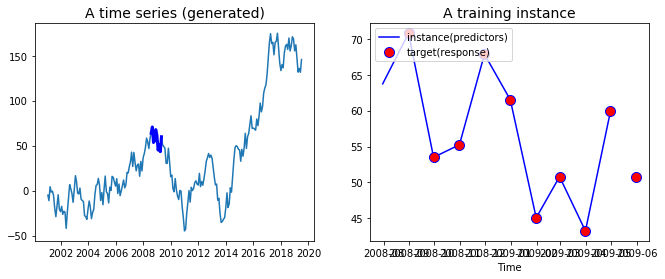

222

In [47]:
ts = create_ts(start = '2001', n = 222)
# Left
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(ts.index, ts)
plt.plot(ts.index[90:100], ts[90:100], "b-", linewidth=3, label="A training instance")
plt.title("A time series (generated)", fontsize=14)

# Right
plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(ts.index[90:100], ts[90:100], "b-", markersize=8, label="instance(predictors)")
plt.plot(ts.index[91:101], ts[91:101], "bo", markersize=10, label="target(response)", markerfacecolor='red')
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [45]:
series = np.array(ts)
n_windows = 20   
n_input =  1
n_output = 1
size_train = 201
print(series.shape)

(222,)


In [46]:
train = series[:size_train]
test = series[size_train:]
print(train.shape, test.shape)

(201,) (21,)


In [53]:
x_data = train[: size_train-1]
x_batches = x_data.reshape(-1, n_windows, n_input)

y_data = train[n_output: size_train]
y_batches = y_data.reshape(-1, n_windows, n_output)

print(x_batches.shape, y_batches.shape)

(10, 20, 1) (10, 20, 1)


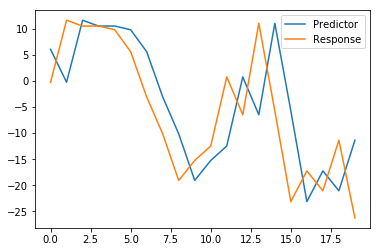

In [55]:
plt.plot(x_batches[0])
plt.plot(y_batches[0])
plt.legend(["Predictor", "Response"])
plt.show()

In [89]:
# Data feed
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_windows, n_input])
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

In [90]:
r_neuron=128

In [91]:
# RNN
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=r_neuron, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)   

In [92]:
# ? look at this
stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])          
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)       
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output])  

In [93]:
learning_rate 

<tf.Tensor 'Reshape_1:0' shape=(?, 20, 1) dtype=float32>

<tf.Tensor 'Placeholder_1:0' shape=(?, 20, 1) dtype=float32>